In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm
import time 
import Yahooimport as Y
import GridSearchLstm as Gs
import matplotlib.pyplot as plt

Using TensorFlow backend.


[*********************100%***********************]  1 of 1 downloaded


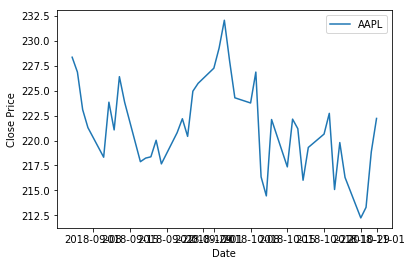

In [3]:
#Step 1 Load Data

# (1) TO DO: Make the loading of data dynamic based on user input

ticker = 'AAPL'

data = Y.retrieve_data(ticker,'2018-09-01','2018-11-01')

plt.plot(data.iloc[:,3],label=ticker)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()

# Select only the Close data as the test value
data = data.iloc[:,3]

# (2) TO DO: Update the X_train, X_test to use additional inputs (need to figure these out)

#X_train, y_train, X_test, y_test = lstm.load_data('sp500_reduced.csv', 10, False)

In [4]:
#Step 2 Build Model

# Perform a grid search of the LSTM model.  Change these values to get a different set of models
# For example, to also test a lag of 10 days, change N_input to [7,10]

N_input = [7]
N_nodes = [50,100]
N_epochs = [50]
N_batch = [1]
N_diff = [12]
N_split = [0.9] #This is the test train split, as a percentage

cfg_list = Gs.model_configs(N_input, N_nodes, N_epochs, N_batch, N_diff, N_split)

models = [lstm.model_fit(data, cfg) for cfg in cfg_list]

for model in models:
    model.summary()

#model = Sequential()

#model.add(LSTM(
#    input_dim=1,
#    output_dim=50,
#    return_sequences=True))
#model.add(Dropout(0.2))

#model.add(LSTM(
#    100,
#    return_sequences=False))
#model.add(Dropout(0.2))

#model.add(Dense(
#    output_dim=1))
#model.add(Activation('linear'))

#start = time.time()
#model.compile(loss='mse', optimizer='rmsprop')
#print('compilation time : ', time.time() - start)

Total configs: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 13,001
Trainable params: 13,001
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_______________________________________________________

In [5]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 8s - loss: 0.0098 - val_loss: 0.0011


yo


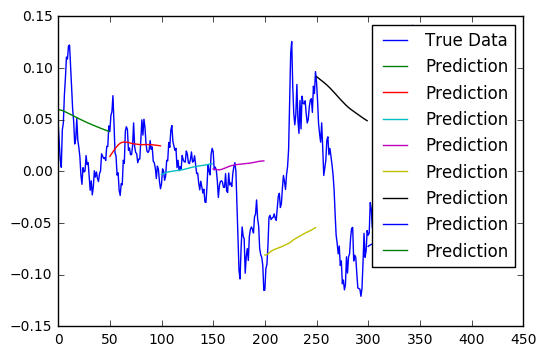

In [6]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

# (4) TO DO: Implement the trading aspect of the model, and output parameters such as CAGR, Sharpe ratio etc.